In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns
import re
import matplotlib.pyplot as plt

# TO DO

1. Relancer nouvelle version scraper 
2. Clean proprement le texte avec les bons stopwords
3. Ajouter les variables Honore's , Simpson, F-measure
4. Sentiment analysis
5. POS taging optimisation temps traitement?

# Importation des différentes données

In [7]:
#prenoms = pd.read_csv('nat2018.csv',sep=';')
#prenoms=prenoms.groupby(['preusuel','sexe'],as_index=False).sum()
#prenoms=prenoms.sort_values(['nombre'],ascending=True)
#prenoms=prenoms.drop_duplicates(subset=['preusuel'],keep='last')
#prenoms=prenoms[['preusuel','sexe']]
#df = pd.read_csv('scraper/scraper/discours2.csv')
df = pd.read_csv('minimal_df.csv')
df.Nom = df.Nom.map(str).apply(lambda x : x.replace(","," "))
df.Titre = df.Titre.apply(lambda x:re.sub('  +', '',x))
df.Fonction= df.Fonction.map(str).apply(lambda x : x[1:])
df['Type'] = df.Titre.apply(lambda x:x.split(' ')[0].lower())
df = df[df.Texte.notna()]
df['PRENOM']=df.Prenom.map(str).apply(lambda x:x.upper())
#df = pd.merge(df,prenoms,how='left',left_on='PRENOM',right_on='preusuel')
#df.drop(['preusuel','PRENOM'],axis=1,inplace=True)
subdf = df[(df.Type == 'déclaration') | (df.Type == 'discours')]

# Analyse des différentes variables hors texte

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

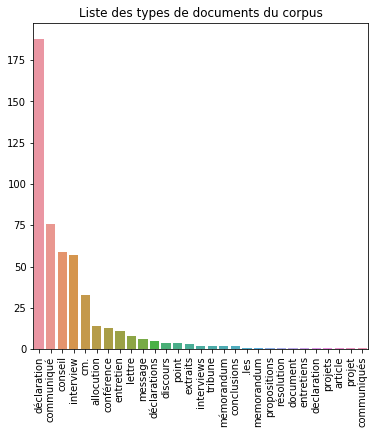

In [8]:
plt.figure(figsize=(6,6))
sns.barplot(x = df.Type.value_counts().head(30).index,y = df.Type.value_counts().head(30).values)
plt.title('Liste des types de documents du corpus')
plt.xticks(rotation=90)

In [9]:
df.sexe.fillna(0,inplace=True)

In [11]:
# Les non reconnus c'est des speech où on ne connait pas la personne 'présidence','ministère'. 

Index(['Unnamed: 0', 'Id', 'Titre', 'Prenom', 'Nom', 'Fonction', 'Date',
       'Tags', 'Texte', 'Lien', 'Type', 'sexe', 'PRENOM'],
      dtype='object')

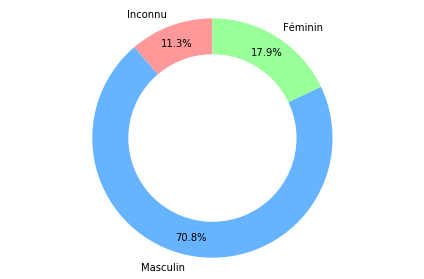

In [14]:
labels = ['Inconnu','Masculin','Féminin']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sizes = [0.112789, 0.707715,0.179496]
fig, ax1 = plt.subplots()
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [16]:
df.Fonction.value_counts().head(5)
# Il faudra reprendre ici il te manque la première lettre, c'est ton code en haut


n                                                     493
remier ministre                                         2
inistre de l'éducation nationale et de la jeunesse      1
inistre de l'action et des comptes publics              1
inistre de la culture                                   1
Name: Fonction, dtype: int64

In [43]:
# Il faut rajouter un code qui va le chercher dans le titre
fonct_titre = []
for titre in df['Titre']:
    try:
        fonct_titre.append(titre.split(',')[1])
    except:
        fonct_titre.append('NA')
        
# Bon c'est pas top ... 

# Concentration sur les discours et sur les déclarations

In [44]:
subdf.sexe.fillna(0,inplace=True)
subdf.sexe.value_counts()

C:\Users\morga\Anaconda3\envs\NLP\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


1.0    175
0.0     17
Name: sexe, dtype: int64

In [46]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
stopWords = set(stopwords.words('french'))

In [47]:
woman = np.array(Image.open("alice.png")) # Il faut que tu mettes l'image dans le git :) 
wc = WordCloud(background_color="white", max_words=100, mask=woman,
               stopwords=stopWords, contour_width=1, contour_color='black')
corpus_f = ' '.join(subdf[subdf.sexe == 2].Texte)
wc.generate(corpus_f)

FileNotFoundError: [Errno 2] No such file or directory: 'alice.png'

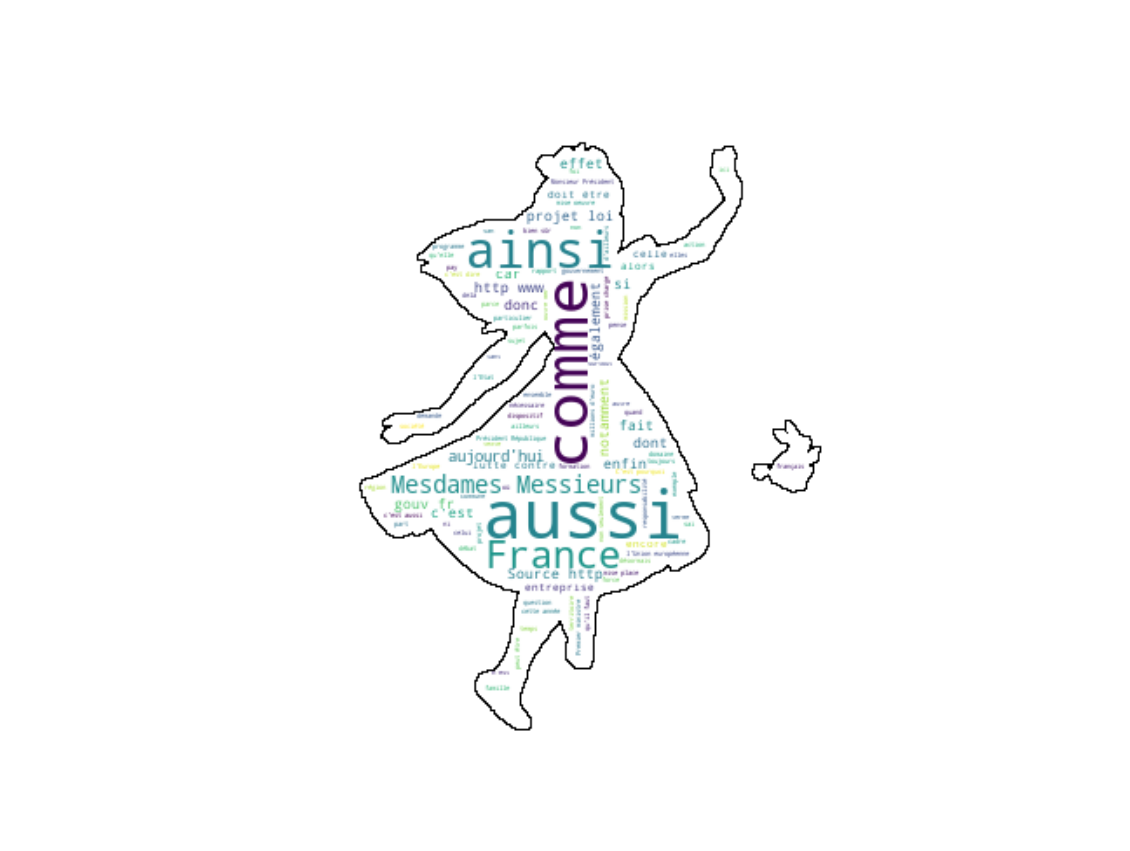

In [72]:
plt.figure(figsize=[20,20])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Il semble qu'il existe beaucoup trop de bruit et de mots n'apportant pas grand chose dans les tops. Il va falloir cleaner. Par exemple, beaucoup de déclaration ou discours on une source : http ...  Je dois reclean mes données, comme un con j'ai pris un mauvais tokennizer pour le texte, il sépare en deux les aujourd'hui , l'autre etc... 

Il faut aussi que j'élimine les Source http à la fin du texte ! C'est corrigé dans la nouvelle version du scrapper que je ferais tourner demain. Le texte n'est pas assez propre

In [48]:
data = pd.read_csv('baseF.csv')

FileNotFoundError: [Errno 2] File baseF.csv does not exist: 'baseF.csv'

In [12]:
data.head(5)

Unnamed: 0  sexe                                              Texte  \
0           0   1.0  Monsieur le Ministre,Mes chers collègues,Mesda...   
1           1   1.0  Monsieur le Président,Mesdames et Messieurs le...   
2           2   1.0  Mesdames et Messieurs, J'ai présidé aujourd'hu...   
3           3   2.0  Messieurs les chefs d'état-major,Madame et mes...   
4           4   1.0  Monsieur le président, Mesdames et Messieurs l...   

   NbCarac  NbPhrases                                              Token  \
0    17256         27  ['monsieur', 'le', 'ministre', 'mes', 'chers',...   
1     1611          8  ['monsieur', 'le', 'président', 'mesdames', 'e...   
2    12075         82  ['mesdames', 'et', 'messieurs', "j'", 'ai', 'p...   
3     3225          3  ['messieurs', 'les', 'chefs', "d'", 'état', 'm...   
4     3928         22  ['monsieur', 'le', 'président', 'mesdames', 'e...   

   NbPunct  NbWord  UniqueWord  UniqueWordTx  NbStopWords  Hapaxlegomena  \
0      468    2820         978      0.346809         1154            675   
1       29     282         168      0.595745          126            124   
2      198    1941         717      0.369397          801            483   
3       69     537         266      0.495345          223            192   
4       95     685         278      0.405839          306            179   

   Hapaxdislegomena       YuleK  
0               140   99.014134  
1                23   79.975856  
2               109   91.206830  
3                31  103.201107  
4                48  121.562150

(-38.711242268966735, 200)

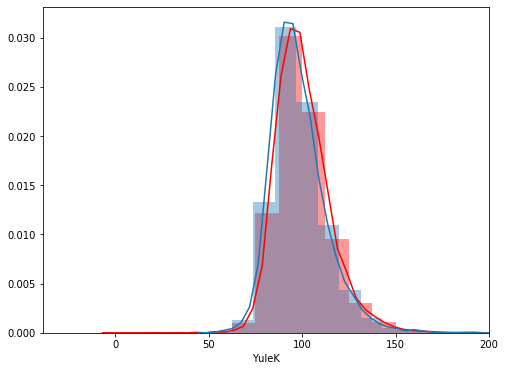

In [13]:
plt.figure(figsize=(8,6))
sns.distplot(data[data.sexe == 2].YuleK,color = 'red')
sns.distplot(data[data.sexe == 1].YuleK)
plt.xlim(right=200)
#distribution presque identique.. Pas trop de diff la dessus

(-99.75506265283607, 300)

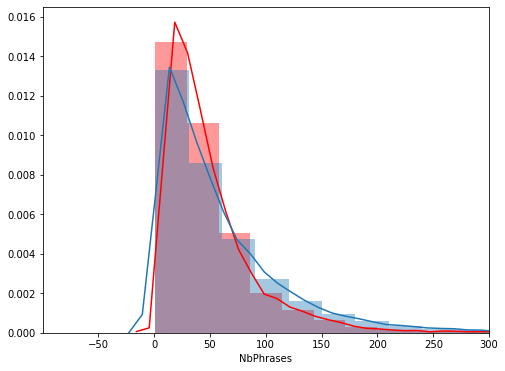

In [18]:
plt.figure(figsize=(8,6))
sns.distplot(data[data.sexe == 2].NbPhrases,color = 'red')
sns.distplot(data[data.sexe == 1].NbPhrases)
plt.xlim(right=300)

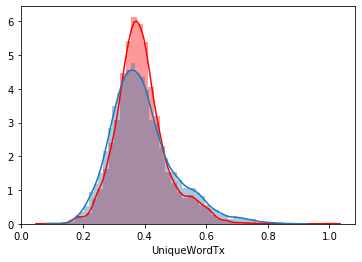

In [20]:
sns.distplot(data[data.sexe == 2].UniqueWordTx,color = 'red')
sns.distplot(data[data.sexe == 1].UniqueWordTx)

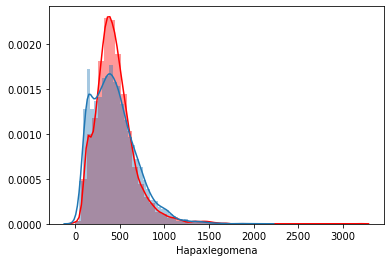

In [21]:
sns.distplot(data[data.sexe == 2].Hapaxlegomena,color = 'red')
sns.distplot(data[data.sexe == 1].Hapaxlegomena)

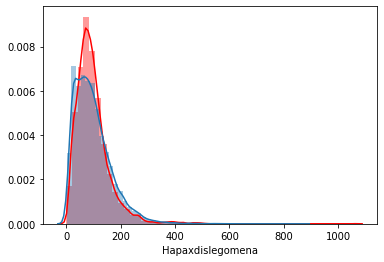

In [22]:
sns.distplot(data[data.sexe == 2].Hapaxdislegomena,color = 'red')
sns.distplot(data[data.sexe == 1].Hapaxdislegomena)

Rien que sur l'ensemble des 'variables structurels' il semble exister des différences notables entre les femmes et les hommes

In [49]:
df.sexe.fillna(0,inplace=True)

In [50]:
df.sexe.value_counts()/len(df)

1.0    0.708
0.0    0.292
Name: sexe, dtype: float64

In [51]:
df.sexe.value_counts()

1.0    354
0.0    146
Name: sexe, dtype: int64

In [52]:
print(round(500*0.707715))

354


In [34]:
min_df = pd.concat([df[df.sexe == 1].sample(354),df[df.sexe == 0].sample(146)])

In [36]:
len(min_df)
min_df.to_csv('minimal_df.csv')

In [25]:
min_df = pd.read_csv('minimal_df.csv')

Petit pavé de fonction

In [28]:
import nltk 
sent_detector = nltk.data.load('tokenizers/punkt/french.pickle')
from collections import Counter
from nltk.corpus import stopwords
stopWords = set(stopwords.words('french'))
def encode(x):
    if x == 1:
        return 0
    else:
        return 1
def tokenize(x):
    from nltk import word_tokenize
    tokens = word_tokenize(x.lower())
    return tokens
def count_punct(tokens):
    import string
    pct = string.punctuation +'...'+'\x92'+'«'+'»'+'``'
    cpt = 0
    for x in tokens:
        if x in pct:
            cpt+=1
    return cpt
def clean_punt(tokens):
    import string
    pct = string.punctuation +'...'+'\x92'+'«'+'»'+'``'+"''"
    return [word for word in tokens if word not in pct]
def count_stopwords(tokens):
    stopWords = set(stopwords.words('french'))
    return len([word for word in tokens if word in stopWords])
def clean_stopwords(tokens):
    stopWords = list(stopwords.words('french'))+['a','aussi','la','le','les','comme','si']
    return [word for word in tokens if word not in stopWords]
def Hapaxlegomena(tokens):
    s = pd.DataFrame(Counter(tokens).items(),columns=['Mot','nb'])
    return len(s[s.nb ==1])
def Hapaxdislegomena(tokens):
    s = pd.DataFrame(Counter(tokens).items(),columns=['Mot','nb'])
    return len(s[s.nb ==2])
def get_yules(tokens):
    """ 
    Retourne yule's k
    (cf. Oakes, M.P. 1998. Statistics for Corpus Linguistics.
    International Journal of Applied Linguistics, Vol 10 Issue 2)
    """
    try:
        token_counter = Counter(tok.upper() for tok in tokens)
        m1 = sum(token_counter.values())
        m2 = sum([freq ** 2 for freq in token_counter.values()])
        i = (m1*m1) / (m2-m1)
        k = 1/i * 10000
        return k
    except:
        return 0

In [29]:
min_df['Token']=min_df.Texte.apply(tokenize)
min_df['NbCarac'] = min_df.Texte.apply(len)
min_df['NbPhrases'] = min_df.Texte.apply(lambda x:len(sent_detector.tokenize(x)))
min_df['NbPunct'] = min_df.Token.apply(count_punct)
min_df['TokenClean']=min_df.Token.apply(clean_stopwords)
min_df['TokenClean']= min_df.TokenClean.apply(clean_punt)
min_df['NbWord']=min_df.TokenClean.apply(len)
min_df['UniqueWord']= min_df.TokenClean.apply(lambda x:len(set(x)))
min_df['UniqueWordTx']= min_df.TokenClean.apply(lambda x:len(set(x))/len(x))
min_df['NbStopWords']=min_df.Token.apply(count_stopwords)
min_df['Hapaxlegomena']=min_df.TokenClean.apply(Hapaxlegomena)
min_df['Hapaxdislegomena']= min_df.TokenClean.apply(Hapaxdislegomena)
min_df['YuleK']=min_df.Token.apply(get_yules)

In [30]:
from functools import reduce
from operator import add
m = min_df.TokenClean
arr = m.array
arr_m =  reduce(add,arr)

In [31]:
cm=Counter(arr_m)
dm = pd.DataFrame(cm, index=['occurrences']).transpose().reset_index()
dm.columns=['word', 'occurences']
dm = dm.sort_values('occurences', ascending=False)

Beaucoup de reclean à faire une fois que j'aurais relancé le scrapper complétement.
Doit on considérer les gallismes comme "c'est" = des stopwords?

## Spacy POS

In [ ]:
! python -m spacy download fr_core_news_sm # En admin 

In [32]:
import spacy
nlp = spacy.load('fr_core_news_sm')

In [33]:
def extractPos(x):
    doc = nlp(x)
    lst_pos = [token.pos_ for token in doc]
    c = Counter(lst_pos)
    return [c['NOUN'],c['DET'],c['PUNCT'],c['ADJ'],c['ADP'],c['PRON'],c['VERB'],c['CCONJ'],c['NUM'],c['PROPN'],c['ADV'],c['SCONJ'],c['AUX'],c['INTJ']]

In [34]:
min_df['NbNom'],min_df['NbDet'],min_df['NbPunct'],min_df['NbAdj'],min_df['NbAdp'],min_df['NbPron'],min_df['NbVerb'],min_df['NbCconj'],min_df['NbNum'],min_df['NbPropn'],min_df['NbAdv'],min_df['NbSCONJ'],min_df['NbAUX'],min_df['NbIntj']=zip(*min_df.Texte.apply(extractPos))

In [35]:
min_df

Unnamed: 0      Id                                              Titre  \
0         70472  130273  Déclaration de M. Pierre Moscovici, ministre d...   
1         58799  128362  Interview de M. Jacques Chirac, Président de l...   
2         76490  154402  Conseil des ministres du 07 Février 1990 La po...   
3         22541  185459  Déclaration de M. Laurent Fabius, ministre des...   
4         17431  191101  Déclaration de M. François Hollande, Président...   
..          ...     ...                                                ...   
495       74821  130627  Communiqué de la présidence de la République, ...   
496       38227  167981  Déclaration de M. Jean-Pierre Chevènement, pré...   
497       75634  128077  Communiqué franco-allemand exposant les propos...   
498       78373  129254  Communiqué de la présidence de la République, ...   
499       73833  132297  Communiqué du ministère des affaires étrangère...   

         Prenom                      Nom Fonction                  Date  \
0        Pierre                Moscovici       an  1997-11-18T12:00:00Z   
1       Jacques                   Chirac       an  2002-04-18T12:00:00Z   
2        Michel                   Rocard       an  1990-02-07T12:00:00Z   
3       Laurent                   Fabius       an  2012-07-06T12:00:00Z   
4      François                 Hollande       an  2014-05-13T12:00:00Z   
..          ...                      ...      ...                   ...   
495         NaN                      NaN       an  1992-02-06T12:00:00Z   
496  Présidence         de la République       an  2007-09-20T12:00:00Z   
497         NaN                      NaN       an  1991-02-04T12:00:00Z   
498         NaN                      NaN       an  1987-12-02T12:00:00Z   
499   Ministère  des Affaires étrangères       an  1993-09-17T12:00:00Z   

                                                  Tags  \
0          Union européenne,Politique agricole commune   
1                                                  NaN   
2               Société - Population,Insertion sociale   
3    Relations internationales,Relations bilatérale...   
4    Relations internationales,Relations bilatérale...   
..                                                 ...   
495                                                NaN   
496  Société - Population,Religion,Institutions de ...   
497                 Union européenne,Politique commune   
498                                                NaN   
499                                                NaN   

                                                 Texte  \
0    Le hasard fait que je suis amené à vous répond...   
1    J.-P. Elkabbach - Monsieur le candidat à l'Ely...   
2    Le Premier ministre a présenté au Conseil des ...   
3    Chers Amis,Messieurs les Premiers Ministres,Me...   
4    « Monsieur le Président, Mesdames, Messieurs, ...   
..                                                 ...   
495  Le service de presse de la Présidence de la Ré...   
496  L'Etat en France « ne reconnaît aucun culte » ...   
497  Le 4 février, M. Dumas et M. Genscher ont prés...   
498  Le Président de la République a marqué son inq...   
499  Au terme des travaux qui ont réuni les deux dé...   

                                                  Lien  ... NbAdp  NbPron  \
0    https://www.vie-publique.fr/discours/130273-de...  ...    62      65   
1    https://www.vie-publique.fr/discours/128362-in...  ...   264     240   
2    https://www.vie-publique.fr/discours/154402-co...  ...    36       6   
3    https://www.vie-publique.fr/discours/185459-de...  ...   190     113   
4    https://www.vie-publique.fr/discours/191101-de...  ...   215     182   
..                                                 ...  ...   ...     ...   
495  https://www.vie-publique.fr/discours/130627-co...  ...    15       0   
496  https://www.vie-publique.fr/discours/167981-de...  ...   411     169   
497  https://www.vie-publique.fr/discours/128077-co...  ...    59       6   
498

In [44]:
min_df.columns

Index(['Unnamed: 0', 'Id', 'Titre', 'Prenom', 'Nom', 'Fonction', 'Date',
       'Tags', 'Texte', 'Lien', 'Type', 'sexe', 'Token', 'NbCarac',
       'NbPhrases', 'NbPunct', 'TokenClean', 'NbWord', 'UniqueWord',
       'UniqueWordTx', 'NbStopWords', 'Hapaxlegomena', 'Hapaxdislegomena',
       'YuleK', 'NbNom', 'NbDet', 'NbAdj', 'NbAdp', 'NbPron', 'NbVerb',
       'NbCconj', 'NbNum', 'NbPropn', 'NbAdv', 'NbSCONJ', 'NbAUX', 'NbIntj'],
      dtype='object')

sexe
0.0    0.481765
1.0    0.439757
Name: nom_perc, dtype: float64

In [72]:
min_df.assign(perc=min_df.NbDet/min_df.NbWord).groupby('sexe')['perc'].mean()

sexe
0.0    0.348371
1.0    0.330117
Name: perc, dtype: float64

In [73]:
min_df.assign(perc=min_df.NbDet/min_df.NbWord).groupby('sexe')['perc'].mean()

sexe
0.0    0.146834
1.0    0.140219
Name: perc, dtype: float64

In [75]:
min_df.assign(perc=min_df.NbPron/min_df.NbWord).groupby('sexe')['perc'].mean()

sexe
0.0    0.068585
1.0    0.159535
Name: perc, dtype: float64

In [77]:
min_df.assign(perc=min_df.NbIntj/min_df.NbWord).groupby('sexe')['perc'].mean()

sexe
0.0    0.000010
1.0    0.000259
Name: perc, dtype: float64